In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv('colonTumor.data', header=None)
names = pd.read_csv('colonTumor.names')

In [3]:
cols = list(data.columns+1)
cols.remove(2001)
cols.append('label')
data.columns = cols
data.head()

,1,2,3,4,5,6,7,8,9,10,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,label
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [4]:
print Counter(data['label'])

Counter({'negative': 40, 'positive': 22})


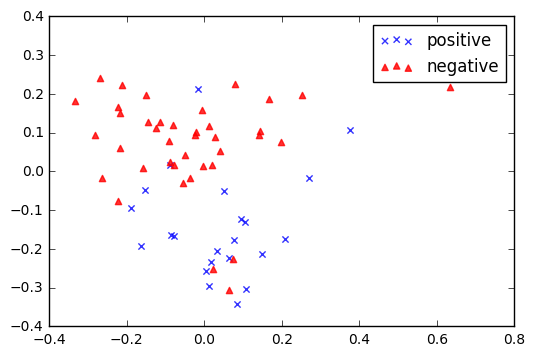

In [5]:
model = KernelPCA(n_components=2, kernel='cosine', gamma=10)
decomposed_data = model.fit_transform(data.drop(['label'], axis=1))
plt.figure()
plt.scatter(decomposed_data[np.where(data['label'] == 'positive'), 0],
            decomposed_data[np.where(data['label'] == 'positive'), 1],
        marker='x', color='b',
        alpha=0.8, label='positive')
plt.scatter(decomposed_data[np.where(data['label'] == 'negative'), 0],
            decomposed_data[np.where(data['label'] == 'negative'), 1],
        marker='^', color='r',
        alpha=0.8, label='negative')
plt.legend(loc='best')
plt.show()

In [6]:
model = LogisticRegression(penalty='l2', C=3, tol=0.0001)
scores = cross_val_score(model, data.drop(['label'], axis=1), data['label'],
                         cv=10, n_jobs=-1, scoring='precision_macro')
print scores
print scores.mean()
#0.8475

[ 0.875  0.9    0.9    1.     1.     0.9    0.9    0.625  0.375  1.   ]
0.8475


In [18]:
model = KernelPCA(n_components=3, kernel='cosine')
decomposed_data = model.fit_transform(data.drop(['label'], axis=1))

In [19]:
model = MLPClassifier(hidden_layer_sizes=(50, 10, 5), max_iter=300,tol=0.0001)
scores = cross_val_score(model, decomposed_data, data['label'],
                         cv=10, n_jobs=-1, scoring='precision_macro')
print scores
print scores.mean()
#0.8925

/home/nilabhra/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/nilabhra/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/nilabhra/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/nilabhra/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/home/nilabhra/anaco

[ 0.9    1.     0.9    0.9    0.9    1.     1.     0.625  0.5    1.   ]
0.8725


In [9]:
data.shape

(62, 2001)